### DA to the "Houses" dataset of Kraggle.

In this project, I worked with the 'Houses' dataset available on Kaggle, focusing on the housing market in the United States between 2006 and 2010. The primary objective was to identify correlations within the dataset, particularly between the 'SalePrice' column and the top 10 columns out of 81. This analysis involved leveraging various variables through data analysis using the Pandas library in Python.

In [12]:
# To begin, I imported essential libraries, particularly 'matplotlib.pyplot' and 'seaborn', 
# enabling the creation of diverse data visualizations.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats
import warnings


In [13]:
# Name df_house the dataframe imported and read with pandas.
df_houses=pd.read_csv("/Users/user/Downloads/train.csv")

# Generate a first glance of the data
df_houses.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
# Taking the columns YearsBuilt and YrSold started to find information from data set, specially the YrSol which gave the 
# time period de data is collected.

df_houses[["YearBuilt","YrSold"]].min()

YearBuilt    1872
YrSold       2006
dtype: int64

In [15]:
df_houses[["YearBuilt","YrSold"]].max()

YearBuilt    2010
YrSold       2010
dtype: int64

In [16]:
# with the "shape" now we have the number of rows and columns in a tuple 

df_houses.shape

(1460, 81)

Going deep into the DA, now we can start to concentrate on the data of the SalePrice. What I want now is to study the real state market behaved between 2006 and 2010 takint the SalePrice as an starting point.

In [17]:
# First I want to find the mean Price 
print("The mean prices in the houses markets between 2006 and 2010 was: ", df_houses["SalePrice"].mean())


The mean prices in the houses markets between 2006 and 2010 was:  180921.19589041095


In [18]:
df_houses["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

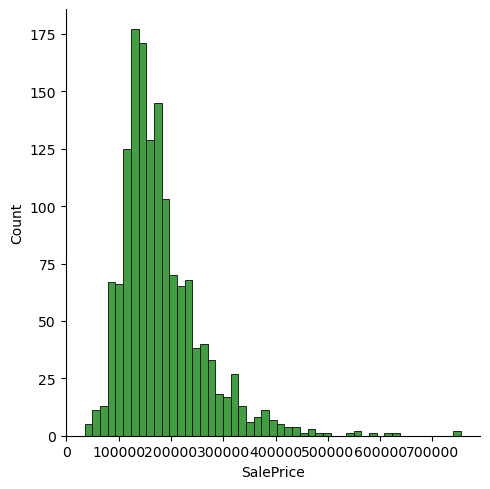

In [19]:
# The graffic displays data of the SalePrice column arround the mean price.
sns.displot(df_houses["SalePrice"],color="green")
plt.show()


Now let´s find out the correlation between the PriceSale and the GrlivArea. In other words here, I try to veify the thesis that in terms of the real state market, "size matters".

In [20]:

var="GrLivArea"


In [21]:
#Concat the two colums into one dataset named "data"
data=pd.concat([df_houses["SalePrice"],df_houses[var]],axis=1)

In [22]:
data

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
...,...,...
1455,175000,1647
1456,210000,2073
1457,266500,2340
1458,142125,1078


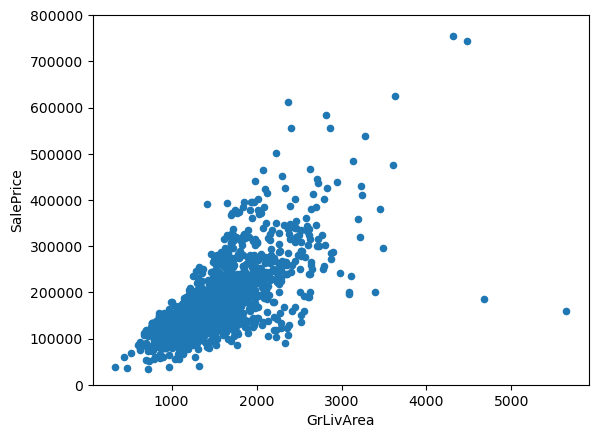

In [23]:
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000));
plt.show()

We observe that as the size of the house increases, the Sale Price tends to rise. However, there are two properties with notably large areas that have comparatively lower Sale Prices in contrast to other properties. These larger properties command lower prices than some smaller ones, despite their bigger size.

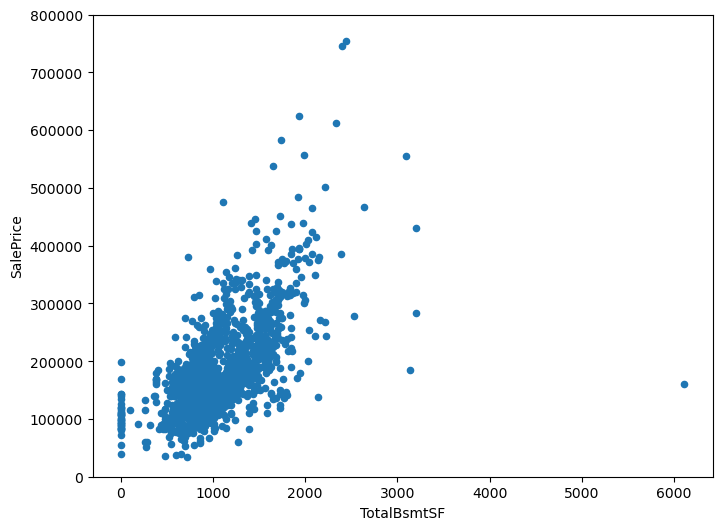

In [24]:
# One of the characteristics in real state market is the basement area, therefore is one variable to consider in order
# stablish a possible correlation.

var="TotalBsmtSF"
data=pd.concat([df_houses["SalePrice"],df_houses[var]],axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000),figsize=(8,6))
plt.show()

As we can see the Basement Area is one of the factor in the SalePrice of a property. Howevewer as the graphic shows in the data near to cero, there are a few properties that don not have basement and yet had SalePrice that reached out USD200.000

In [25]:
#Now we can go into another DA with the column "OverallQual" that refers to cualitive variable. So now can make the Analisis
# between two diferent kind of varibles with the box plot from seaborn.

var='OverallQual'
data=pd.concat([df_houses["SalePrice"],df_houses[var]],axis=1)
data

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
...,...,...
1455,175000,6
1456,210000,6
1457,266500,7
1458,142125,5


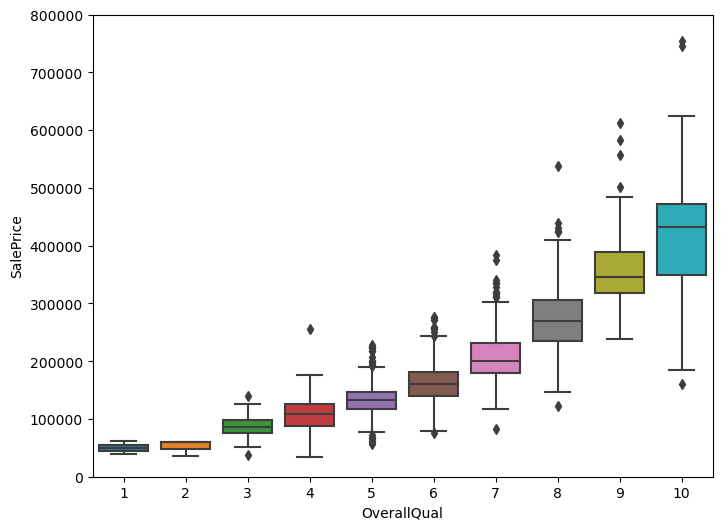

In [26]:
f , ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="SalePrice", data= data)
fig.axis(ymin=0,ymax=800000)
plt.show()

Even though the OverallQual is important in the Sale Price, we can notice that there are properties with less Quality index and still have a higher price for example in the case of the level of OverallQual levels 9 and 10.

In [27]:
#Matrix de correlación
#Como se relacionan las variables.
cormat=df_houses.corr()

Correlation Matrix

A correlation matrix is a tabular representation that illustrates the relationships between variables in a dataset. It showcases the correlation coefficients between every pair of variables in a table format. Each cell in the matrix represents the correlation between two variables, typically ranging from -1 to 1.

A value of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other also increases proportionally.
A value of -1 signifies a perfect negative correlation, implying that as one variable increases, the other decreases proportionally.
A value of 0 suggests no linear relationship between the variables.
Correlation matrices are valuable in data analysis, especially in understanding which variables are related and to what extent. They help identify potential associations and dependencies between different features within a dataset, aiding in decision-making processes and feature selection in various analytical tasks.


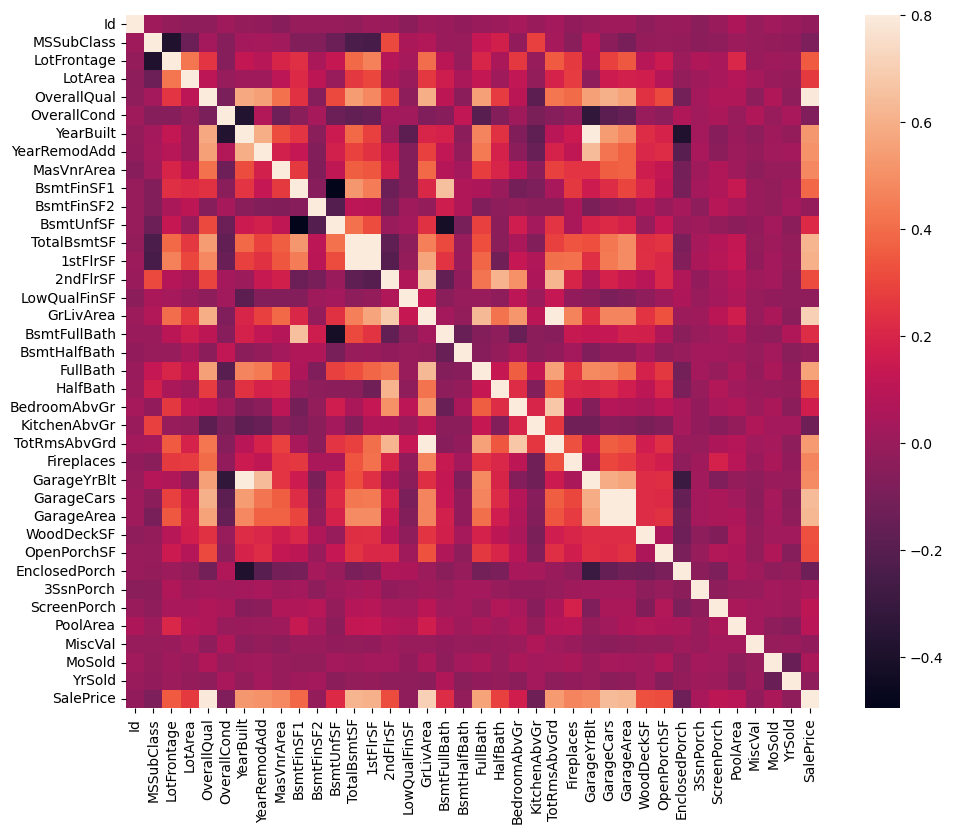

In [28]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cormat,vmax=.8,square= True)
plt.show()

Having the Correlation Matrix let´s find out the Top 10 most correlated variables in the dataset with the SalePrice data.

In [29]:

K=10
cols=cormat.nlargest(K,"SalePrice")["SalePrice"].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [30]:
cm=np.corrcoef(df_houses[cols].values.T)
cm


array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

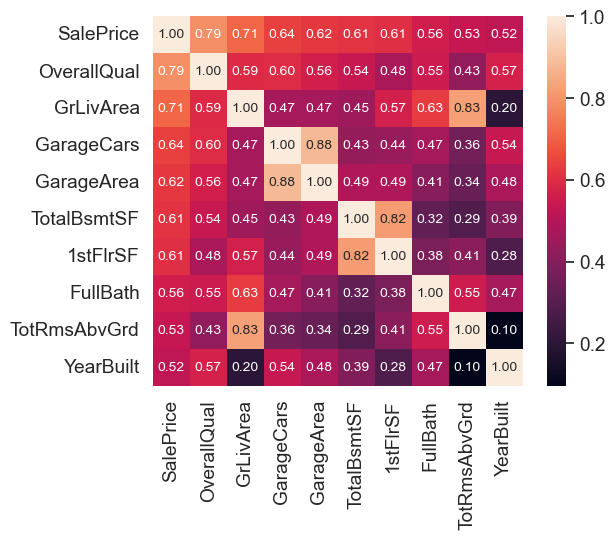

In [31]:
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True, annot=True,square= True,fmt=".2f", annot_kws={"size":10,},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

# Conclusion
Having in mind the definition of a Correlation Matrix we can observe now that there are mainly 4 columns strongly related with the SalePrice: Overall Quality, GrlivArea, Garage Cars and Garage Area which means in terms of bussines intelligence that if there is a investment company o person interested on the real state market those should be the main four elements to take into consideration, among other factors such as location.